<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

In [24]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [25]:
## Load the Diabetes dataset
data= datasets.load_diabetes()
# Load the diabetes dataset from sklearn


In [26]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [27]:
data['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [28]:
# Description

In [29]:
# Predictors
X = pd.DataFrame(data.data,columns = data.feature_names)
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [30]:
# Target
y = data.target


In [31]:
type(y)

numpy.ndarray

#### 1.2 Create a Base Model Using Linear Regression

In [32]:
# Create Model
lr = LinearRegression()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state =1)

In [34]:
# Fit
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
# Score
from sklearn.metrics import r2_score
lr.score(X_test,y_test) #how much of y depends on x


0.43845698491295737

In [39]:
# Check Coeffiricent. The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.
lr.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [52]:
len(lr.coef_) #number of coefficients/variables in the column

10

In [40]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [42]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

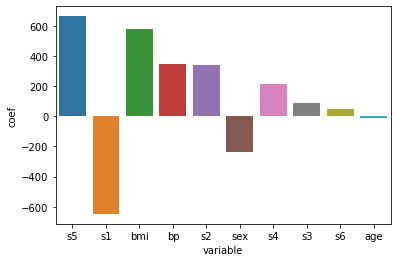

In [43]:
# Plot Coefficients
view_coeff(X, lr)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [47]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate. The alpha is the lambda, it is the penalty. 
ridge_alphas = np.logspace(-6, 6, 200) # The numpy.logspace() function returns number spaces evenly w.r.t interval on a log scale.
# - 6 is starting value of the sequence
# 6 is the final value of the sequence
# 200 is the number of samples to generate


# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))
errors

[5340.629657524551,
 5339.87235194331,
 5339.002363765827,
 5338.002946827226,
 5336.854872763715,
 5335.536065181765,
 5334.0211805568515,
 5332.281128382553,
 5330.28252196386,
 5327.9870502909225,
 5325.350760094483,
 5322.323235921047,
 5318.846664622389,
 5314.854769098684,
 5310.271594576316,
 5305.0101290421035,
 5298.970737876877,
 5292.039391214392,
 5284.085661383967,
 5274.960466853836,
 5264.493539090608,
 5252.490589471873,
 5238.73015579823,
 5222.960112281573,
 5204.8938342197125,
 5184.206019720739,
 5160.528187494011,
 5133.443893366057,
 5102.483741398829,
 5067.120310992568,
 5026.763182941949,
 4980.754329533691,
 4928.364241929842,
 4868.7893087828725,
 4801.151140778168,
 4724.498764913863,
 4637.814898457315,
 4540.027863917902,
 4430.031129049521,
 4306.712951940668,
 4168.999174331796,
 4015.912817577721,
 3846.6547556745304,
 3660.710300354846,
 3457.9869252601866,
 3238.988418431167,
 3005.0302591931477,
 2758.4996709851184,
 2503.1612437435556,
 2244.5048446

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

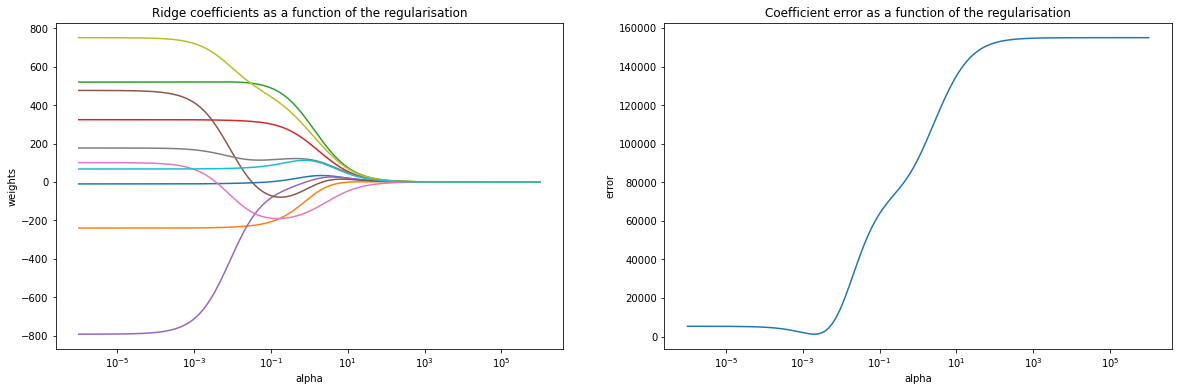

In [48]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

# ridge will increase the variance while reducing the weights of the coefficients.
#as alpha increases, the strength of the coefficients will reduce until it is close to 0 but it doesnt reach 0 because only lasso reaches 0

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [54]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10) # cv= 10 specifies that there are 10 folds where folds means the number of groups 
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_test, y_test))

Alpha: 0.06669919663030115
Score: 0.4441078245121034


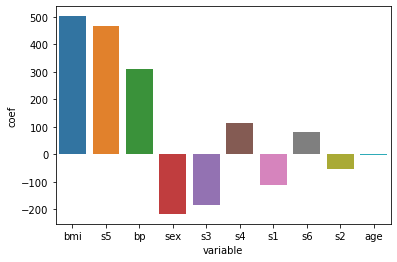

In [51]:
view_coeff(X, optimal_ridge)

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [64]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasso_reg = Lasso()

# keep track of the intermediate results for coefficients and errors
las_coefs = []
las_errors = []


# create a range of alphas to calculate
lasso_alphas = np.logspace(-6,6,200)


# Train the model with different regularisation strengths
for b in lasso_alphas:
    lasso_reg.set_params(alpha = b)
    lasso_reg.fit(X, y)
    las_coefs.append(lasso_reg.coef_)
    las_errors.append(mean_squared_error(lasso_reg.coef_, lr.coef_))
errors


[155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699845348,
 155022.86699

In [59]:
len(las_coefs) , len(lasso_alphas)

(200, 200)

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

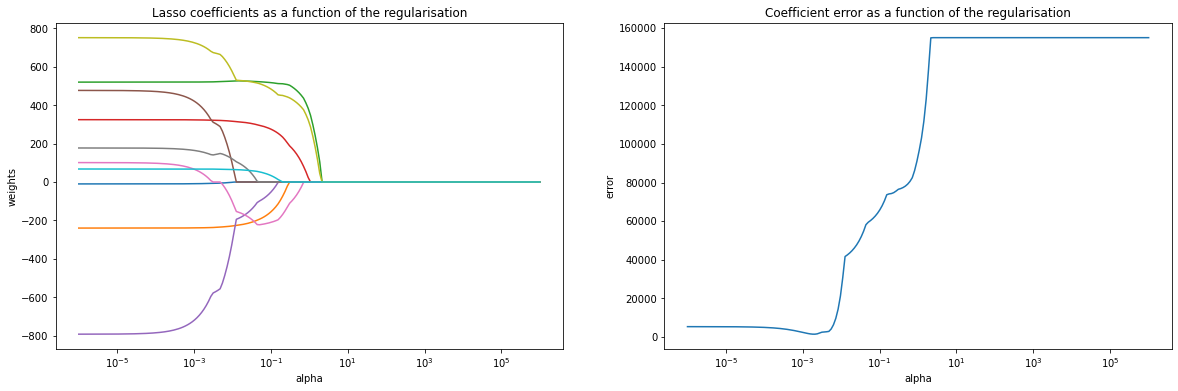

In [65]:
# Display results

# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, las_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, las_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

#lasso regression can hit 0 so we know which parameters/variables can be removed 

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [66]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10) # cv= 10 specifies that there are 10 folds where folds means the number of groups 
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_test, y_test))

Alpha: 0.05805225516094896
Score: 0.44231713558733765


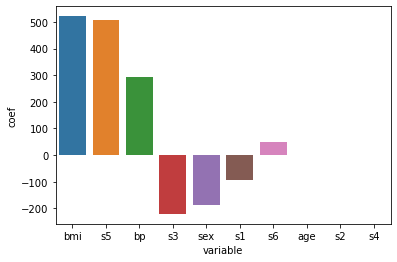

In [67]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

In [ ]:
#Linear regression score= 0.43845698491295737
#ridge regression score = 0.4441078245121034
#lasso regression score = 0.44231713558733765

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

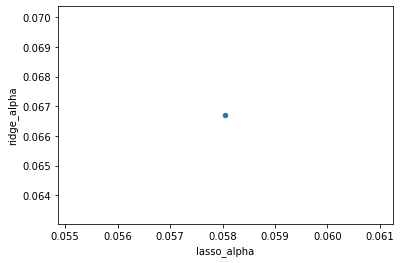

In [71]:
# Build the ridge and lasso using optimal alpha

df = pd.DataFrame([[optimal_lasso.alpha_, optimal_ridge.alpha_]], columns = ['lasso_alpha','ridge_alpha'])

ax1 = df.plot.scatter(x='lasso_alpha', y='ridge_alpha')

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge

In [ ]:
# model residuals:

In [ ]:
# Jointplot



---



---



> > > > > > > > > Â© 2021 Institute of Data


---



---



